# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [160]:
airbnb_data = pd.read_csv("data/airbnb_NYC.csv", encoding='latin1')
airbnb_data.columns = airbnb_data.columns.str.lower().str.strip().str.replace(" ", '_')
airbnb_data["price"] = (
    airbnb_data["price"]
        .str.replace(",", "")
        .astype(int)
)
print(airbnb_data.isna().sum())
airbnb_data.head()

host_id                          0
host_since                       3
name                             0
neighbourhood                    0
property_type                    3
review_scores_rating_(bin)    8323
room_type                        0
zipcode                        134
beds                            85
number_of_records                0
number_of_reviews                0
price                            0
review_scores_rating          8323
dtype: int64


,host_id,host_since,name,neighbourhood,property_type,review_scores_rating_(bin),room_type,zipcode,beds,number_of_records,number_of_reviews,price,review_scores_rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


I renamed the columns to be all lowercase and stripped whitespace, then replaced whitespace between words with _ to make it easier to get cols.  I also converted all the values in the price col to int.  Since they were all strings and the ones above 999 had commas, I had to replace them with nothing, so I could cleanly convert to int.  I also checked for NaN values in the column, but there weren't any.

2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.

In [161]:
popo = pd.read_csv("data/mn_police_use_of_force.csv")
print(popo['subject_injury'].isna().sum()/len(popo['subject_injury']))
popo['subject_injury'] = popo['subject_injury'].fillna("Missing")
pd.crosstab(
    popo["force_type"],
    popo["subject_injury"],
    dropna=False
)

0.7619342359767892


subject_injury,Missing,No,Yes
force_type,,,
Baton,2,0,2
Bodily Force,7051,1093,1286
Chemical Irritant,1421,131,41
Firearm,0,2,0
Gun Point Display,27,33,44
Improvised Weapon,74,34,40
Less Lethal,87,0,0
Less Lethal Projectile,0,1,2
Maximal Restraint Technique,170,0,0


About 76% of the values are NaN.  There is a lot more taser, bodily force, and chemical irritant with the missing values.

3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.

In [162]:
meta = pd.read_csv("data/metabric.csv")
meta.columns = meta.columns.str.lower().str.strip().str.replace(" ", '_')
meta['overall_survival_status'] = meta['overall_survival_status'].apply(lambda x: int(x.split(':')[0]))
meta.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,chemotherapy,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_(months),overall_survival_status,radio_therapy,tmb_(nonsynonymous),tumor_size,tumor_stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1,YES,5.230071,31.0,4.0


4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [163]:
print(airbnb_data["review_scores_rating"].isna().sum())
print(airbnb_data.shape)
airbnb_data["review_scores_rating"] = airbnb_data["review_scores_rating"].fillna(airbnb_data["review_scores_rating"].mean())
airbnb_data.head()

8323
(30478, 13)


,host_id,host_since,name,neighbourhood,property_type,review_scores_rating_(bin),room_type,zipcode,beds,number_of_records,number_of_reviews,price,review_scores_rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,91.99323
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,91.99323
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,91.99323
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,91.99323
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.00000


A little under a third of the review scores are NaNs.  This will probably bias/negatively impact our rating because the entire point of ratings is to give an idea of how an airbnb compares to other ones.  Filling with the median is useless, and misleads the user as far as rating rather than being transparent with the uncertatintly.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?

In [164]:
shark_data = pd.read_excel("shark.xls")
shark_data.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Drop any columns that do not contain data.

In [165]:
shark_data = shark_data.drop(columns=['Unnamed: 21', 'Unnamed: 22'])
shark_data.shape

(7073, 21)

3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.

There are not any columns that only have nans.  The last 2 cols only have 1 or 2 non-Nan numbers, so I am going to drop those.  Because there are so few compared to the number of rows, they do not provide useful data.

4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

0.0 2026.0


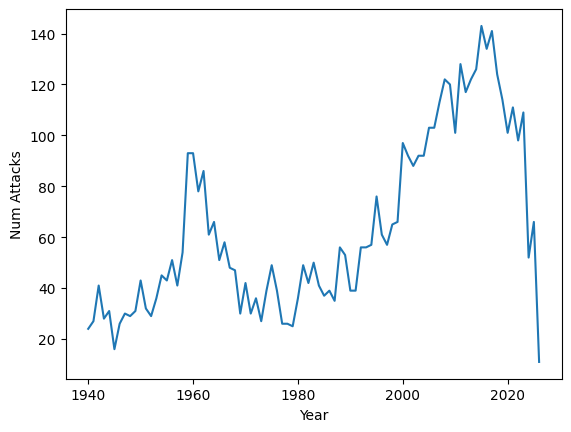

In [166]:
print(shark_data['Year'].min(), shark_data['Year'].max())
shark_data = shark_data[shark_data['Year'] >= 1940]
shark_data.groupby('Year').size().plot()
plt.xlabel('Year')
plt.ylabel('Num Attacks')
plt.show()

Attacks appear to be increasing over time since 1940.  Although there was a spike around 1960.

5. Clean the Age variable and make a histogram of the ages of the victims.

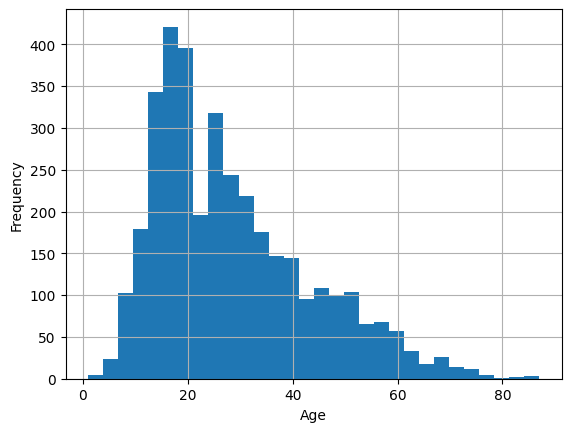

In [167]:
shark_data['Age'] = pd.to_numeric(shark_data['Age'], errors='coerce')
shark_data['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

In [168]:
shark_data['Type'] = shark_data['Type'].fillna('Unknown')
shark_data['Type'] = shark_data['Type'].apply(
    lambda x: 'Unprovoked' if 'unprovoked' in str(x).lower() 
    else ('Provoked' if 'provoked' in str(x).lower() 
    else 'Unknown')
)
print(shark_data['Type'].value_counts())
print(f"\nProportion unprovoked: {(shark_data['Type'] == 'Unprovoked').sum() / len(shark_data)}")

Type
Unprovoked    4125
Unknown        889
Provoked       523
Name: count, dtype: int64

Proportion unprovoked: 0.7449882607910421


7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

In [169]:
shark_data['Fatal Y/N'] = shark_data['Fatal Y/N'].fillna('Unknown')
shark_data['Fatal Y/N'] = shark_data['Fatal Y/N'].apply(lambda x: 'Y' if str(x).strip().upper() == 'Y' else ('N' if str(x).strip().upper() == 'N' else 'Unknown'))
shark_data['Fatal Y/N'].value_counts()

Fatal Y/N
N          4245
Y           830
Unknown     462
Name: count, dtype: int64

8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [170]:
pd.crosstab(shark_data['Type'], shark_data['Fatal Y/N'], normalize='index')

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,0.957935,0.017208,0.024857
Unknown,0.411699,0.449944,0.138358
Unprovoked,0.818909,0.012848,0.168242


From the crosstab, we can see that the attack is more likely to be fatal if it is unprovoked.  Maybe the unprovoked sharks are already doing it for the love of the game or they are hungry.  

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?

The paper is about how to turn untidy datasets into tidy ones.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

The goal of the tidy data standard is to structure datasets to facilitate analysis.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

"Like families, tidy datasets are all alike but every messy dataset is messy in its own way."  This means that the end goal (a tidy dataset) is standardized, but the input, which is a messy dataset, always needs a unique combination of things done to it to get it tidy.   

"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." As he explains, this means that it is clear what the observations and variables are, but the precise definition of them can be changed, modified and re-expressed.  He used the example of "home phone" and "work phone".  That can sometimes be more useful if it was just "phone number" and "phone type".

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Values are numbers or strings.  Every value belongs to a variable and an observation.  A variable contains all values that measure the same attribute across units, an observation contains all values measured on a unit across variables.

  5. How is "Tidy Data" defined in section 2.3?

Tidy data is a standard way of mapping the meaning of a dataset to its structure.  
1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

- Column headers are values, not variable names.  
- Multiple variables are stored in one column.  
- Variables are stored in both rows and columns.  
- Multiple types of observational units are stored in the same table.  
- A single observational unit is stored in multiple tables.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 has a column for each day in the month, and tons of NaNs.  Molten table 12 has multiple types of observational units stored in the same table, multiple variables stored in one column, and variables are stored in both rows and columns.  
Tidy table 12 has variables in columns, observations in rows.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.

In [171]:
foreign_gifts = pd.read_csv("data/ForeignGifts_edu.csv")
foreign_gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

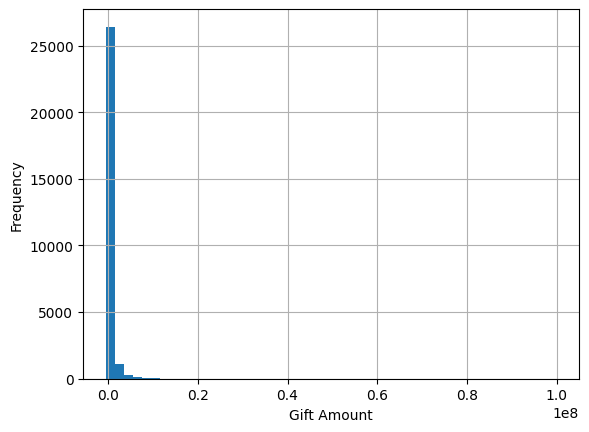

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

In [172]:
foreign_gifts['Foreign Gift Amount'].hist(bins=50)
plt.xlabel('Gift Amount')
plt.ylabel('Frequency')
plt.show()
foreign_gifts['Foreign Gift Amount'].describe()

The distribution is extremely right skewed with most gifts being small amounts but a few very large gifts.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

In [173]:
gift_type_counts = foreign_gifts['Gift Type'].value_counts()
print(gift_type_counts)
print("\nProportions:")
print(foreign_gifts['Gift Type'].value_counts(normalize=True))

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [174]:
print("Top 15 countries by number of gifts:")
print(foreign_gifts['Country of Giftor'].value_counts().head(15))
print("\n\nTop 15 countries by total amount:")
print(foreign_gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))

Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


Top 15 countries by total amount:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA      

5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 

Top 15 institutions by total amount received:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int

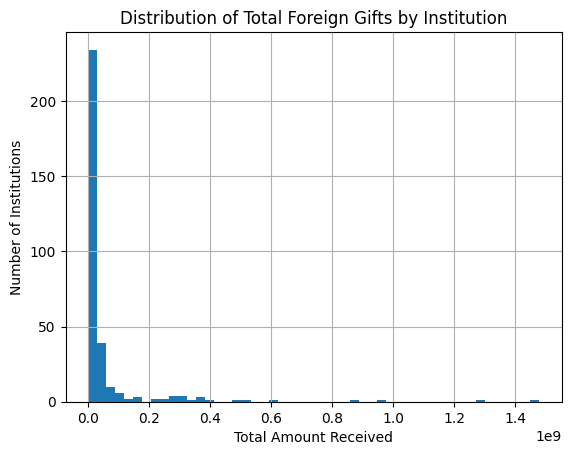

In [175]:
print("Top 15 institutions by total amount received:")
top_institutions = foreign_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_institutions)
print("\n")
foreign_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().hist(bins=50)
plt.xlabel('Total Amount Received')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Foreign Gifts by Institution')
plt.show()

6. Which giftors provide the most money, in total? 

In [176]:
foreign_gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.

In [177]:
college = pd.read_csv("data/college_completion.csv")
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.

In [178]:
print(f"Observations: {college.shape[0]}, Variables: {college.shape[1]}")
college.head()

Observations: 3798, Variables: 63


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3. Cross tabulate `control` and `level`. Describe the patterns you see in words.

In [179]:
pd.crosstab(college['control'], college['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Public institutions have more 2-year colleges, while private not-for-profit has more 4-year institutions. Private for-profit institutions are relatively evenly split between 2-year and 4-year.

4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?

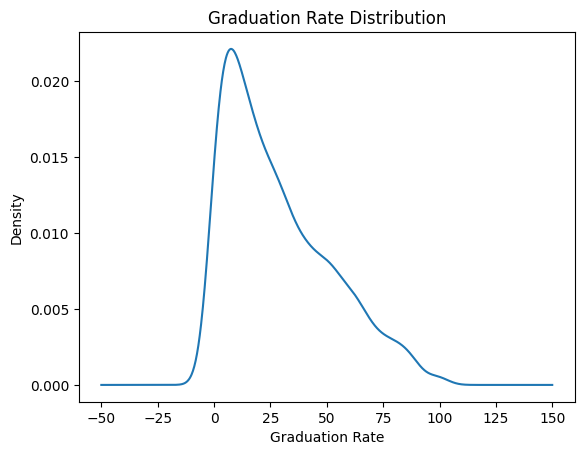

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [180]:
college['grad_100_value'].plot(kind='kde')
plt.xlabel('Graduation Rate')
plt.title('Graduation Rate Distribution')
plt.show()
college['grad_100_value'].describe()

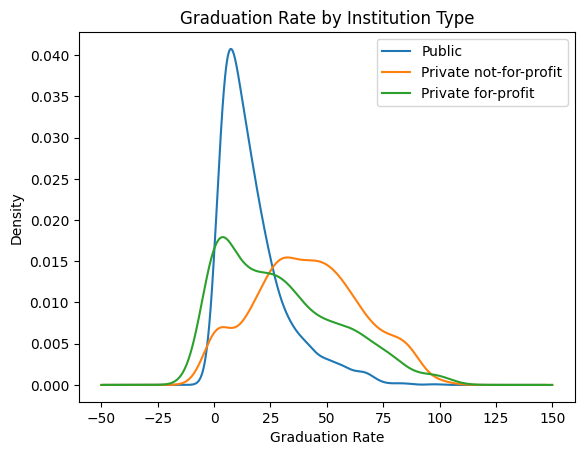

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [181]:
for control_type in college['control'].unique():
    college[college['control'] == control_type]['grad_100_value'].plot(kind='kde', label=control_type)
plt.xlabel('Graduation Rate')
plt.title('Graduation Rate by Institution Type')
plt.legend()
plt.show()
college.groupby('control')['grad_100_value'].describe()

Private not-for-profit institutions have the highest graduation rates on average.

5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

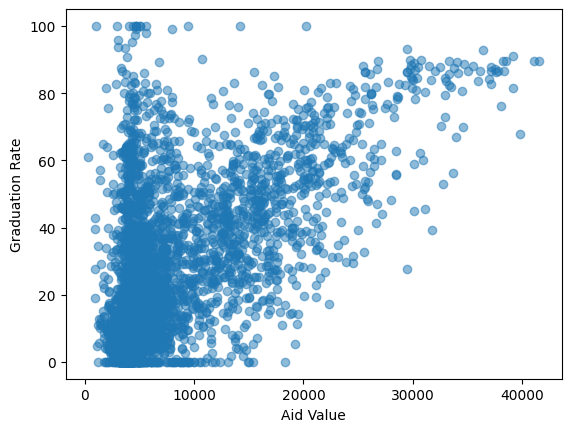

Covariance: 88610.4831690244
Correlation: 0.5758792845936078


In [182]:
plt.scatter(college['aid_value'], college['grad_100_value'], alpha=0.5)
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate')
plt.show()
print(f"Covariance: {college['aid_value'].cov(college['grad_100_value'])}")
print(f"Correlation: {college['aid_value'].corr(college['grad_100_value'])}")

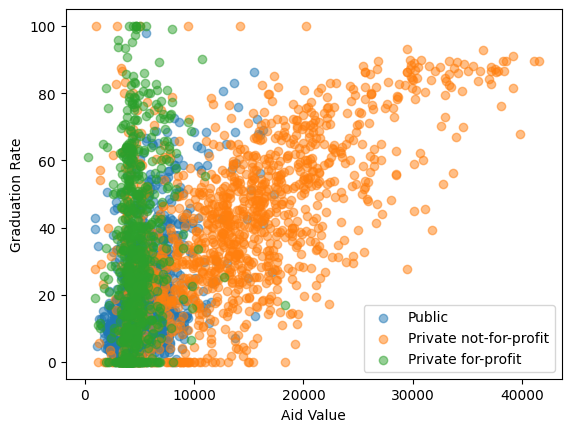

control
Private for-profit        0.188363
Private not-for-profit    0.601591
Public                    0.482481
dtype: float64

In [183]:
for control_type in college['control'].unique():
    subset = college[college['control'] == control_type]
    plt.scatter(subset['aid_value'], subset['grad_100_value'], alpha=0.5, label=control_type)
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate')
plt.legend()
plt.show()
college.groupby('control').apply(lambda x: x['aid_value'].corr(x['grad_100_value']))

Aid seems to vary positively with graduation rates mostly for private not-for-profit institutions.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

My work is in the pdf in the same directory as this file.

1. Show that $m(a + bX) = a+b \times m(X)$.

2. Show that $ \text{cov}(X,X) = s^2$.

3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$

4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.

5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?

6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.

In [184]:
ames = pd.read_csv("data/ames_prices.csv")
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?

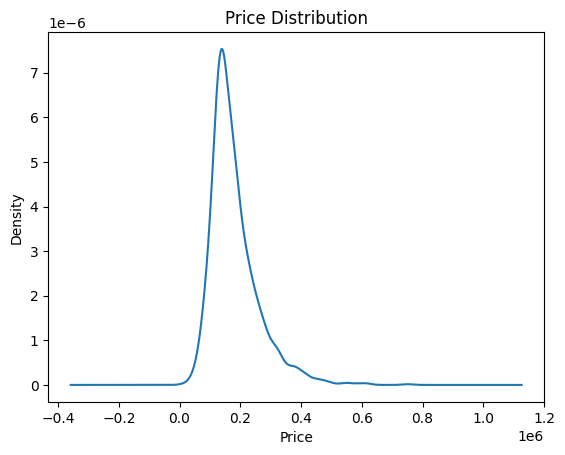

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [185]:
ames['price'].plot(kind='kde')
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()
ames['price'].describe()

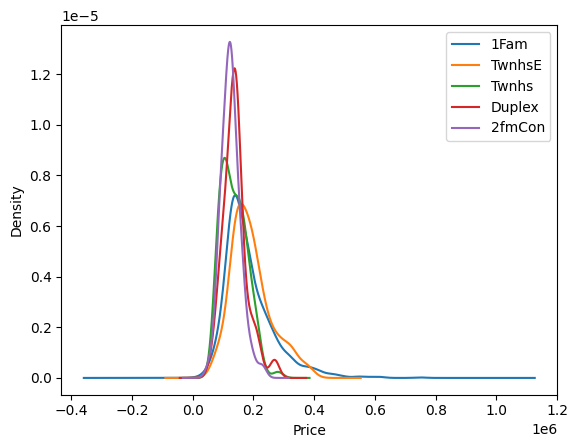

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [186]:
for bldg_type in ames['Bldg.Type'].unique():
    ames[ames['Bldg.Type'] == bldg_type]['price'].plot(kind='kde', label=bldg_type)
plt.xlabel('Price')
plt.legend()
plt.show()
ames.groupby('Bldg.Type')['price'].describe()

Single family homes (1Fam) are the most expensive on average and have the highest variance in prices.

3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).

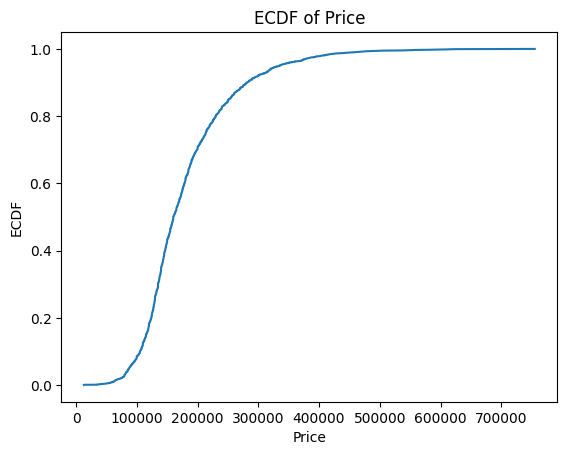

Min: 12789
25th percentile: 129500.0
Median: 160000.0
75th percentile: 213500.0
Max: 755000


In [187]:
import numpy as np
sorted_price = np.sort(ames['price'])
ecdf = np.arange(1, len(sorted_price)+1) / len(sorted_price)
plt.plot(sorted_price, ecdf)
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.title('ECDF of Price')
plt.show()
print(f"Min: {ames['price'].min()}")
print(f"25th percentile: {ames['price'].quantile(0.25)}")
print(f"Median: {ames['price'].median()}")
print(f"75th percentile: {ames['price'].quantile(0.75)}")
print(f"Max: {ames['price'].max()}")

4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?

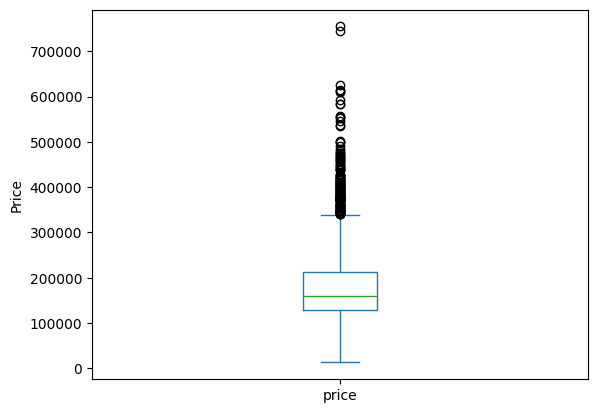

In [188]:
ames['price'].plot(kind='box')
plt.ylabel('Price')
plt.show()

Yes, there are lots of outliers on the high end.

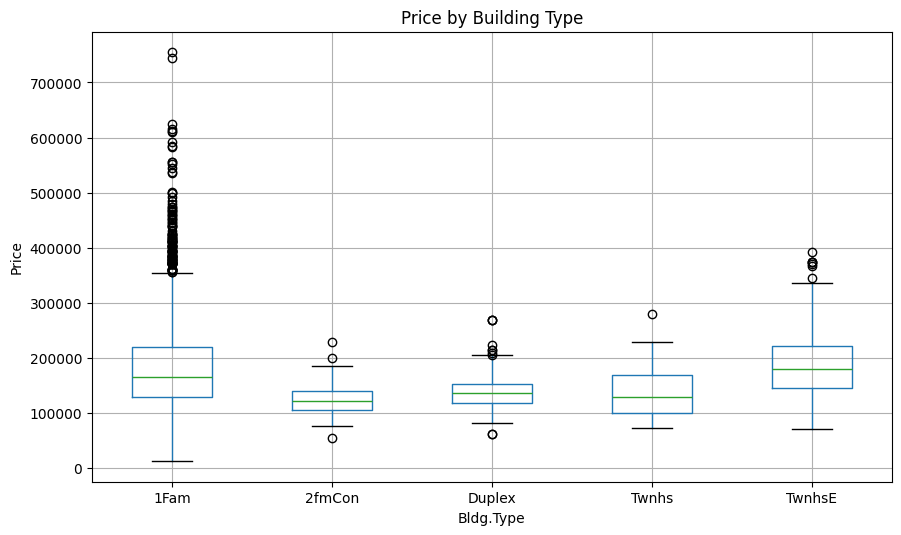

In [189]:
ames.boxplot(column='price', by='Bldg.Type', figsize=(10, 6))
plt.ylabel('Price')
plt.title('Price by Building Type')
plt.suptitle('')
plt.show()

Single family homes have the most outliers. End of unit townhomes have the highest median.  The other building types have more compressed price ranges.

5. Make a dummy variable indicating that an observation is an outlier.

In [190]:
q1 = ames['price'].quantile(0.25)
q3 = ames['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
ames['is_outlier'] = ((ames['price'] < lower_bound) | (ames['price'] > upper_bound)).astype(int)
print(f"Number of outliers: {ames['is_outlier'].sum()}")
ames['is_outlier'].value_counts()

Number of outliers: 137


is_outlier
0    2793
1     137
Name: count, dtype: int64

6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

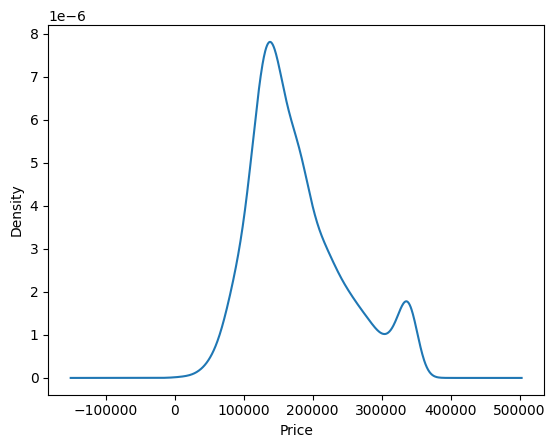

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: price_winsorized, dtype: float64

In [191]:
ames['price_winsorized'] = ames['price'].clip(lower=lower_bound, upper=upper_bound)
ames['price_winsorized'].plot(kind='kde')
plt.xlabel('Price')
plt.show()
ames['price_winsorized'].describe()

The winsorized distribution has a smaller range and reduced variance, with the extreme values capped at the upper bound.